<a href="https://colab.research.google.com/github/e-olang/Computer-Vision/blob/main/Mkulima/Rice%20Leaf/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/Rice Leaf/

/content/drive/MyDrive/Colab Notebooks/Rice Leaf


In [2]:
%ls

data/  kaggle.json  notebook.ipynb  RiceLeafs/  riceleafs.zip


### modeling

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib

from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/Rice Leaf/RiceLeafs/train"

# /content/drive/MyDrive/Colab Notebooks/Rice Leaf/data2/riceleafs/RiceLeafs

In [5]:
data_dir = pathlib.Path(path)

In [7]:
img_height,img_width = 180,180
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.1,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 2684 files belonging to 4 classes.
Using 2416 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2684 files belonging to 4 classes.
Using 268 files for validation.


In [16]:
classnames = train_ds.class_names
print(classnames)

['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']


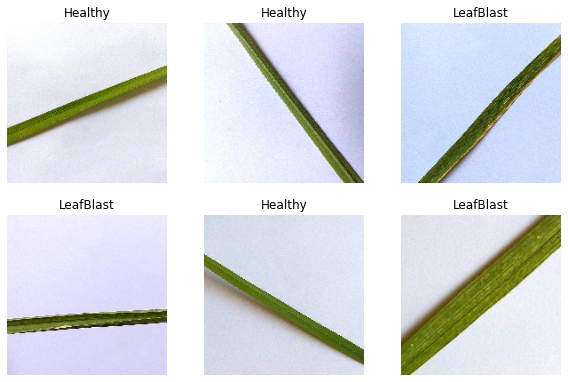

In [17]:
plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classnames[labels[i]])
        plt.axis("off")

In [18]:
res_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(
                                include_top = False,
                                input_shape = (180, 180, 3),
                                pooling = 'avg', classes = 5,
                                weights = 'imagenet'
                            )

for layer in pretrained_model.layers:
    layer.trainable = False

res_model.add(pretrained_model)

94781440/94765736 [==============================] - 1s 0us/step


In [19]:
res_model.add(Flatten())
res_model.add(Dense(512, activation = 'relu'))
res_model.add(Dense(4, activation = 'softmax'))

In [20]:
res_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
_________________________________________________________________


In [21]:
res_model.compile(optimizer=Adam(lr = 0.001),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = res_model.fit(train_ds,
                        validation_data = val_ds,
                        epochs = 10)